

# Project: Investigate a Dataset - [TMDB-movies dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> Rounak Banik is a data scientist and machine learning engineer who created the TMDB-movies dataset. The dataset contains information about movies, including their titles, release dates, budgets, revenues, runtimes, genres, popularity, average ratings, and vote counts. 


### Question(s) for Analysis
> The Qusetion Analysis is baesd on my wonrding  
> First Question is what are The Top 10 movie failed to make enough money at the box office to cover their costs.
> Secon Question How has the average budget for movies changed over the years.
> third Question What is the oldest movie with the highest  popularity.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



In [2]:
df=pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
df.isnull().sum() 
# imdb_id , cast ,homepage ,director,tagline,keywords,overview,genres,production_companies,

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.duplicated().sum()

1


### Data Cleaning

In [7]:
# reamove no nedd 
df.drop(['imdb_id','homepage','tagline','overview','budget_adj','revenue_adj'],axis =1,inplace = True)

In [8]:
#change format 
df['release_date']=pd.to_datetime(df['release_date'])

In [9]:
# Changing Release_date from string to datetime format, and change budget and revneue to integer
df['release_date'] = pd.to_datetime(df['release_date'])
df['budget'] = df['budget'].astype(int)
df['revenue'] = df['revenue'].astype(int)
df['popularity'] = df['popularity'].astype(int)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(10865, 15)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. Remember to utilize the visualizations that the pandas library already has available.



> **Tip**: Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Top 10 movie failed to make enough money at the box office to cover their costs !)

In [12]:
#Use this, and more code cells, to explore your data. Don't forget to add
#in order to find the profet I will Subtract the budget with the rene ans make a column 
dfQ1=df
dfQ1['financial gain']=dfQ1['budget']-dfQ1['revenue']
dfQ1=dfQ1[['financial gain','original_title']]

In [13]:
dfQ1.groupby('original_title')

In [14]:
df_indexed = dfQ1.set_index('original_title')

In [15]:
df_indexed=df_indexed.sort_values(by='financial gain')

In [16]:
df_indexed=df_indexed.tail(10)

In [17]:
df_indexed

,financial gain
original_title,
The 13th Warrior,98301101
Brother Bear,99999750
Dragonball Evolution,100000000
Double Wedding,104002432
Mars Needs Moms,111007242
The Alamo,119180039
The Pacific,120000000
The Wolfman,150000000
The Lone Ranger,165710090


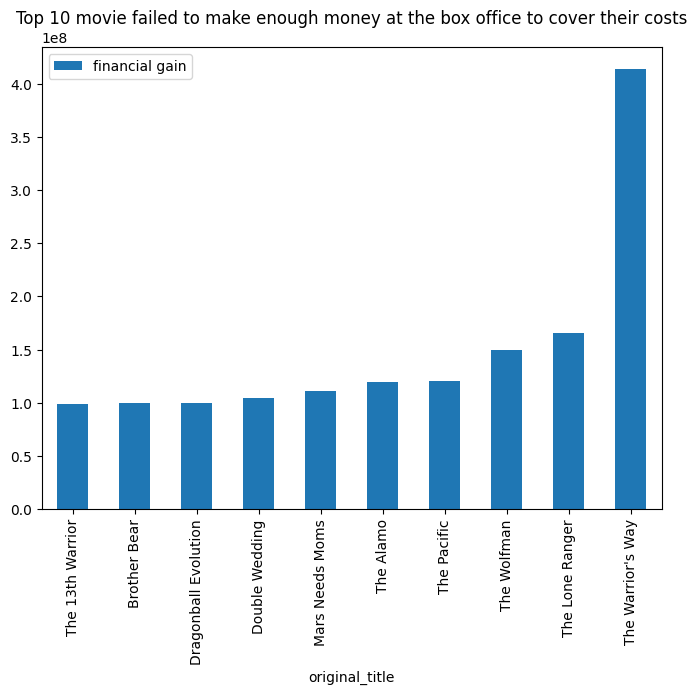

In [18]:
df_indexed.plot(kind ='bar',figsize=(8,6))
plt.title('Top 10 movie failed to make enough money at the box office to cover their costs');


### Research Question 2  (How has the average budget for movies changed over the years!)

<AxesSubplot: ylabel='release_year'>

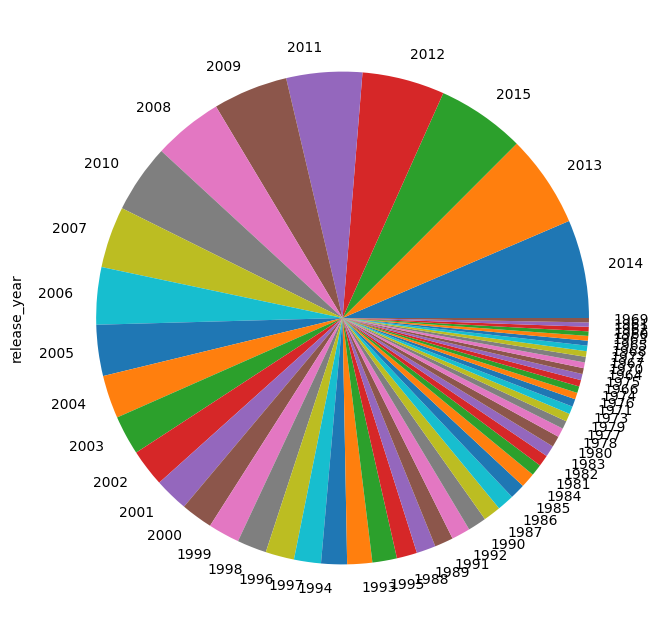

In [18]:
# Continue to explore the data to address your additional research
# bused on my investagion for the question "Top 10 movie failed to make enough money at the box office to cover their costs'
# are The Warrior's Way , The Lone Ranger , The Wolfman , The pacific , The Alamo , Mars Nedds Moms , Double Wedding Dragonball Evalution , Brother Bear ,The 13th Warrior
# 
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df['release_year'].value_counts().plot(kind = 'pie', figsize = (8,8))
#  60's,70's,80's,90's ,2005's 2010 , 2015 , 2014  

In [19]:
decades = [1970, 1980, 1990,2000,2005,2010,2014]
average_budgets_millions = []
for decade in decades:
    movies_in_decade = df[df["release_year"] >= decade]
    average_budgets_million = movies_in_decade["budget"].mean()/ 1000000
    average_budgets_millions.append(average_budgets_million)
    

In [20]:
average_budgets_millions

[15.073279744073123,
 15.720803717658828,
 16.853934905172416,
 16.8499626402958,
 15.411396316221767,
 14.2590332221914,
 11.678357934537248]

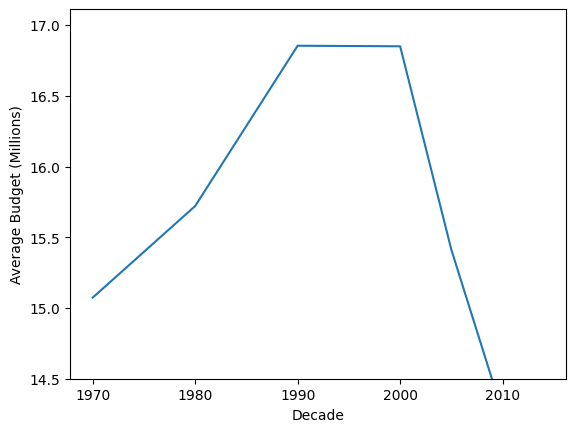

In [21]:
plt.plot(decades,average_budgets_millions)
plt.xlabel("Decade")
plt.ylabel("Average Budget (Millions)")
plt.ylim(14.5, None)
plt.show()

### Research Question 3  (What is the oldest movie with the highest  popularity !)

In [22]:
dfQ3=df
# Find the oldest movie with the highest popularity
oldest_movie = dfQ3.loc[dfQ3["popularity"] == dfQ3["popularity"].max(), "release_year"].min()


In [23]:
# Print the title of the oldest movie
print(dfQ3.loc[dfQ3["release_year"] == oldest_movie, "original_title"].values[0])

Jurassic World


<a id='conclusions'></a>
## Conclusions

### Answer of Research Question  1 : 

> After I investigate at the datset I found that The Top 10 movie failed to make enough money at the box office to cover their costs are . Which is mean to find the Subtraction of bdguet and the revenw and Find the finnanaitl cost 
>1- The Warrior's Way
>2- The Lone Ranger 
>3- The Wolfman
>4- The pacific 
>5- The Alamo 
>6- Mars Nedds Moms
>7- Double Wedding Dragonball Evalution 
>8- Brother Bear 
>9- The 13th Warrior

### Answer of Research Question  2 :

> Then after I find the top movie who coudnt make a great funding I wondred what are how much the bdguet it decrese in each year or perd of time 
> but Igusee that I have same logic error 

### Answer of Research Question  3 :

>Lastly  what is th eoldet movie with the hisget popurlty? and It was Jurassic World



In [1]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] Writing 875662 bytes to Investigate_a_Dataset.html
